# Escola de Programação

Este projeto tem por objetivo estudar entradas e saídas de dados de diferentes formatos, utilizando Pandas. E foi produzido com base na formação "Python pada Data Science" da Alura.

In [1]:
import pandas as pd

## Criando alunos para a escola

In [2]:
#importa nomes via API
alunos_f = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f")
alunos_m = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m")

In [3]:
alunos_f

,nome,regiao,freq,rank,sexo
0,MARIA,0,11694738,1,F
1,ANA,0,3079729,2,F
2,FRANCISCA,0,721637,3,F
3,ANTONIA,0,588783,4,F
4,ADRIANA,0,565621,5,F
...,...,...,...,...,...
195,ROSANE,0,82203,196,F
196,IVONETE,0,81878,197,F
197,LUCIANE,0,81230,198,F
198,ISADORA,0,81100,199,F


In [4]:
alunos_m

,nome,regiao,freq,rank,sexo
0,JOSE,0,5732508,1,M
1,JOAO,0,2971935,2,M
2,ANTONIO,0,2567494,3,M
3,FRANCISCO,0,1765197,4,M
4,CARLOS,0,1483121,5,M
...,...,...,...,...,...
195,WALTER,0,67207,196,M
196,ARLINDO,0,66669,197,M
197,MICHAEL,0,65736,198,M
198,ALVARO,0,65444,199,M


In [5]:
#Concatenando o dataframe
alunos_m_f = [alunos_m, alunos_f]

alunos = pd.concat(alunos_m_f)['nome'].to_frame()
print(f'Trouxemos {alunos.shape[0]} nomes pra nossa escola')

Trouxemos 400 nomes pra nossa escola


In [6]:
alunos

,nome
0,JOSE
1,JOAO
2,ANTONIO
3,FRANCISCO
4,CARLOS
...,...
195,ROSANE
196,IVONETE
197,LUCIANE
198,ISADORA


## Gerando ID para alunos

In [7]:
import numpy as np

In [8]:
np.random.seed(123) #Manter a sequencia pseudo-aleatoria

In [9]:
alunos['id'] = np.random.permutation(alunos.shape[0])+1

In [10]:
alunos

,nome,id
0,JOSE,235
1,JOAO,43
2,ANTONIO,304
3,FRANCISCO,156
4,CARLOS,343
...,...,...
195,ROSANE,231
196,IVONETE,99
197,LUCIANE,323
198,ISADORA,383


## Criando emails para os alunos

In [11]:
dominios = ['@email.com.br', '@mailto.com']

In [12]:
alunos['email'] = alunos.nome.str.lower() + np.random.choice(dominios, alunos.shape[0]) 

In [13]:
alunos

,nome,id,email
0,JOSE,235,jose@email.com.br
1,JOAO,43,joao@mailto.com
2,ANTONIO,304,antonio@mailto.com
3,FRANCISCO,156,francisco@mailto.com
4,CARLOS,343,carlos@mailto.com
...,...,...,...
195,ROSANE,231,rosane@email.com.br
196,IVONETE,99,ivonete@mailto.com
197,LUCIANE,323,luciane@email.com.br
198,ISADORA,383,isadora@mailto.com


## Cursos

In [14]:
!pip install html5lib
!pip install lxml

In [15]:
import html5lib

In [16]:
url_cursos = 'http://tabela-cursos.herokuapp.com/index.html'

In [17]:
#importando html
cursos = pd.read_html(url_cursos)

cursos = cursos[0]

cursos = cursos.rename(columns = {'Nome do curso': 'curso'})

cursos['id'] = cursos.index + 1

cursos = cursos.set_index('id')

cursos

,curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python
6,PHP com MySql
7,.NET para web
8,Novas integrações com Java
9,TDD com Java


# Matrículas

In [23]:
# Gerando quantidade de matrículas

alunos['matriculas'] = np.ceil(np.random.exponential(size = alunos.shape[0]) * 1.5).astype(int)

In [24]:
alunos

,nome,id,email,matriculas
0,JOSE,235,jose@email.com.br,2
1,JOAO,43,joao@mailto.com,1
2,ANTONIO,304,antonio@mailto.com,2
3,FRANCISCO,156,francisco@mailto.com,3
4,CARLOS,343,carlos@mailto.com,1
...,...,...,...,...
195,ROSANE,231,rosane@email.com.br,2
196,IVONETE,99,ivonete@mailto.com,5
197,LUCIANE,323,luciane@email.com.br,1
198,ISADORA,383,isadora@mailto.com,3


In [25]:
alunos.matriculas.describe()

count    400.000000
mean       2.117500
std        1.501442
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       12.000000
Name: matriculas, dtype: float64

c:\users\guto\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='matriculas', ylabel='Density'>

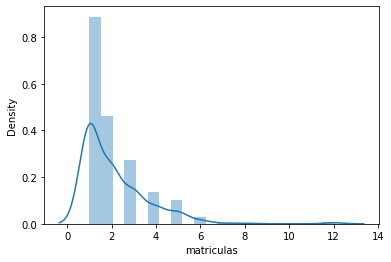

In [26]:
#visualizando distribuição da quantidade de matriculas gerada
import seaborn as sns

sns.distplot(alunos.matriculas)

In [28]:
alunos.matriculas.value_counts() #quantos alunos possuem 'n' matrículas

1     186
2      97
3      57
4      29
5      21
6       6
12      2
7       1
8       1
Name: matriculas, dtype: int64

## Cursos por aluno

In [34]:
cursos_matriculados = [] #lista vazia para armazenar os cursos matriculados
id_cursos = np.random.rand(cursos.shape[0]) #variável para selecionar ids de curso aleatórias
prob = id_cursos/sum(id_cursos) #probabilidade de escolha do curoso

#Percorrendo cada linha da lista de alunos, para realizar matriculas aleatórias em curssos
for index, row in alunos.iterrows():
    id = row.id
    qtd_matriculas = row.matriculas
    for i in range(qtd_matriculas):
        matricular = [id, np.random.choice(cursos.index, p = prob)]
        cursos_matriculados.append(matricular)

matriculas = pd.DataFrame(cursos_matriculados, columns = ['id_aluno', 'id_curso'])

matriculas

,id_aluno,id_curso
0,235,17
1,235,1
2,43,11
3,304,6
4,304,17
...,...,...
842,383,13
843,383,2
844,383,2
845,366,2


In [41]:
#alunos por curos
qtd_alunos_df = matriculas.groupby('id_curso').count().join(cursos['curso']).rename(columns={'id_aluno': 'qtd_alunos'})

cursos['qtd_alunos'] = qtd_alunos_df.qtd_alunos

cursos

,curso,qtd_alunos
id,,
1,Lógica de programação,67
2,Java para Web,53
3,C# para Web,58
4,Ruby on Rails,50
5,Cursos de Python,6
6,PHP com MySql,53
7,.NET para web,13
8,Novas integrações com Java,8
9,TDD com Java,81


# Exportando tabelas

In [42]:
cursos.to_csv('data\cursos.csv', sep = ';', index = True) #neste caso mantive index = True para não perder a id do curso

In [45]:
alunos.to_csv('data\\alunos.csv', sep = ';', index = False)

In [46]:
matriculas.to_csv('data\matriculas.csv', sep = ';', index = False)

As exportações também poderiam ser exportadas para diferentes formatos, como:
    * json com .to_json()
    * html com .to_html()
    * excel com .to_excel()

# Gravando tabelas em um banco de dados local


In [58]:
!pip install sqlalchemy

In [59]:
from sqlalchemy import create_engine, MetaData, Table, inspect

In [60]:
engine = create_engine('sqlite:///:memory:') #cria o banco local

In [61]:
matriculas.to_sql('matriculas', engine) #cria a tabela matriculas no banco criado

In [63]:
#mostra as tabelas no banco
inspector = inspect(engine)

print(inspector.get_table_names())

['matriculas']


In [64]:
cursos.to_sql('cursos', engine)
alunos.to_sql('alunos', engine)

In [65]:
inspector = inspect(engine)

print(inspector.get_table_names())

['alunos', 'cursos', 'matriculas']


## Lendo o Banco

In [68]:
query = 'select * from cursos where qtd_alunos < 20'

In [69]:
pd.read_sql(query, engine)

,id,curso,qtd_alunos
0,5,Cursos de Python,6
1,7,.NET para web,13
2,8,Novas integrações com Java,8
3,11,Preparatório para certificação Java,12
4,14,Desenvolvendo jogos,11
5,16,Estatística básica,10
6,20,Orientação objetos com Java,17


In [73]:
tabela_alunos = pd.read_sql_table('alunos', engine, columns=['nome', 'email','matriculas']) #acessa diretamente a tabela

tabela_alunos.query('matriculas > 5') #query direto na tabela

,nome,email,matriculas
51,ROGERIO,rogerio@mailto.com,6
71,BENEDITO,benedito@email.com.br,7
92,DIOGO,diogo@email.com.br,6
178,DENILSON,denilson@mailto.com,12
228,SONIA,sonia@mailto.com,6
242,MARLENE,marlene@email.com.br,6
258,ALESSANDRA,alessandra@mailto.com,8
291,CELIA,celia@mailto.com,12
365,EUNICE,eunice@email.com.br,6
370,MARINALVA,marinalva@mailto.com,6


# Excel

## Listas de presença

In [109]:
!pip install openpyxl

import openpyxl

In [115]:
nome_curso = input('Para qual curso deseja gerar a lista de presença?: ')

id_curso = cursos[cursos.curso == nome_curso].index[0] #pega a id do curso escolhido

turma_lista = matriculas.query('id_curso == {}'.format(id_curso)) #procura os alunos do curso

turma_lista = turma_lista.set_index('id_aluno').join(alunos.set_index('id'))['nome'].to_frame() #cria uma lista com o nome dos alunos

turma_lista = turma_lista.rename(columns = {'nome': 'Alunos do curso de {}'.format(nome_curso)})

turma_lista.index.name = 'id_aluno'

#salvando lista

turma_lista.to_excel('data/turma_lista.xlsx', index = True)

print('Lista salva:')
turma_lista

Para qual curso deseja gerar a lista de presença?: Análise de dados
Lista salva:


,Alunos do curso de Análise de dados
id_aluno,
5,JOSUE
24,ANA
35,GEOVANE
36,NILTON
47,ANDREA
55,PEDRO
64,PAULA
70,VANESSA
74,IRACI
